In [2]:
#!pip install geopandas folium matplotlib cartopy shapely plotly

In [3]:
pip install geopandas folium matplotlib cartopy shapely plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
import geopandas as gpd

In [5]:
world = gpd.read_file(
	"https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
)

In [6]:
world.head()

featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL FCLASS_GR  FCLASS_IT  \
0          None          None          None      None       None   
1          None          None          None      None       None   
2  Unrecognized  Unrecognized  Unrecognized      None       None   
3          None          None          None      None       None   
4          None          None          None      None       None   

      FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0          None      None       None      None   
1          None      None       None      None   
2  Unrecognized      None       None      None   
3          None      None       None      None   
4          None      None       None      None   

                                            geometry  
0  MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...  
1  POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...  
4  MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...  

[5 rows x 169 columns]

In [7]:
world.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)

<Axes: >

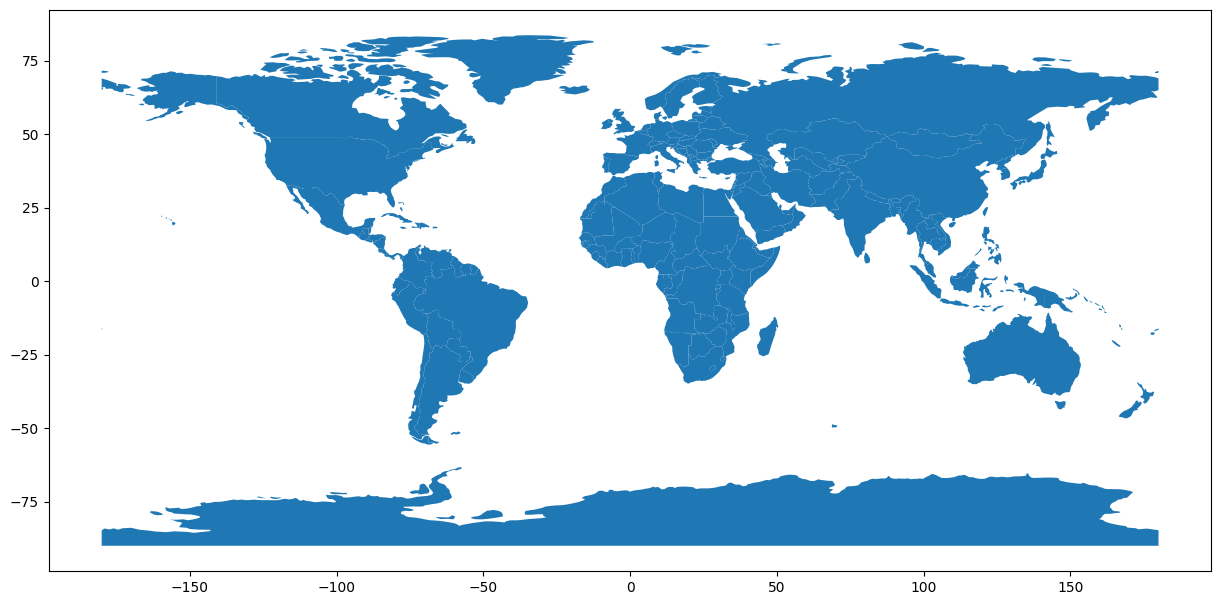

In [8]:
world.plot(figsize=(15, 10))

<Axes: >

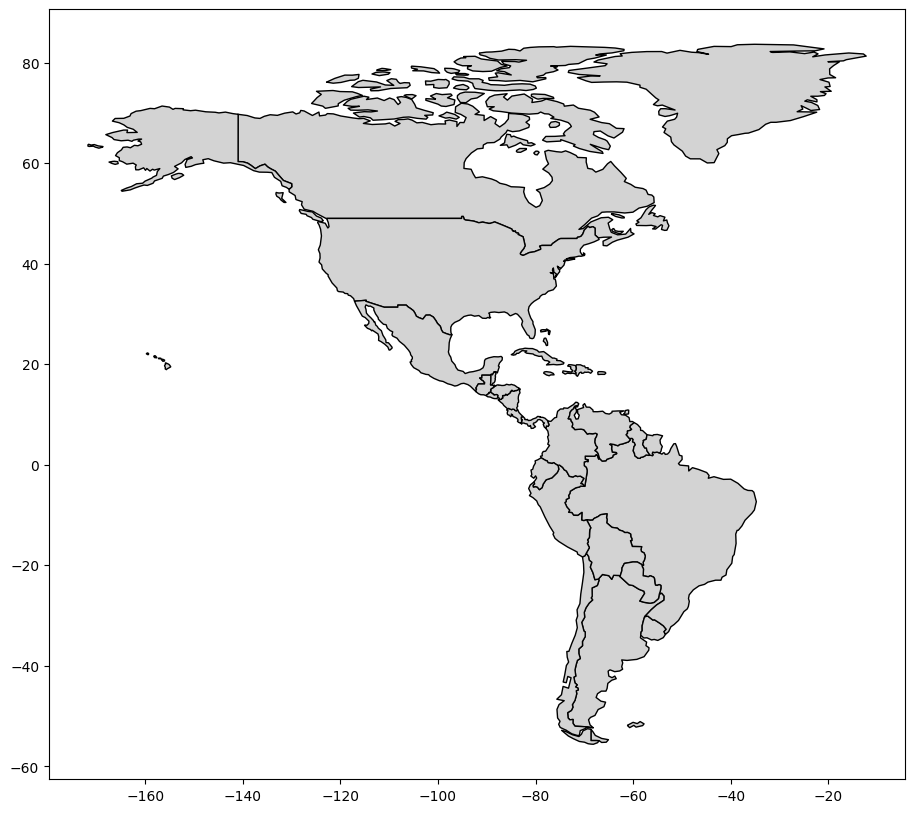

In [9]:
world[world['REGION_UN'] == 'Americas'].plot(figsize=(15, 10), color='lightgrey', edgecolor='black')

<Axes: >

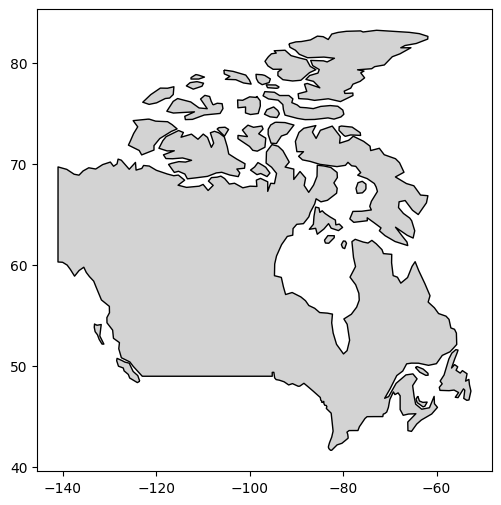

In [10]:
world[world['FORMAL_EN' ] == 'Canada'].plot(figsize=(12, 6), color='lightgrey', edgecolor='black' )

In [11]:
import geopandas as gpd
import pandas as pd
import folium
pd.set_option ('display.max_columns', None)

In [12]:
mapa = folium.Map(location=[0, 0], zoom_start=2)
folium.GeoJson(
    world,
    name= 'NAME'        
).add_to(mapa)

folium.LayerControl().add_to(mapa)
mapa.save('mapa.html')


In [13]:
mapa

In [14]:
mapa = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(
    geo_data=world,
    data=world,
    columns=['NAME', 'POP_EST'],
    key_on='feature.properties.NAME',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
).add_to(mapa)
folium.LayerControl().add_to(mapa)
mapa.save('mapa_choropleth.html')

In [15]:
mapa

In [16]:
# Filter Spain data from the world dataset
spain = world[world['FORMAL_EN'] == 'Kingdom of Spain']

# Create a map focused on Spain
spain_map = folium.Map(location=[40.4637, -3.7492], zoom_start=6)

# Add Spain's boundaries to the map
folium.GeoJson(
    spain,
    name='Spain',
    style_function=lambda x: {
        'fillColor': '#ffcca5',
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.7
    }
).add_to(spain_map)

# Add layer control
folium.LayerControl().add_to(spain_map)

spain_map

In [17]:
# Create a more detailed map of Spain
spain_map = folium.Map(location=[40.4637, -3.7492], zoom_start=6)

# Add Spain's boundaries with custom style
folium.GeoJson(
    spain,
    name='Spain',
    style_function=lambda x: {
        'fillColor': '#ffcca5',
        'color': 'black',
        'weight': 1.5,
        'fillOpacity': 0.5,
        'dashArray': '5, 5'
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['NAME', 'POP_EST', 'GDP_MD'],
        aliases=['Country:', 'Population:', 'GDP (MD):'],
        localize=True
    )
).add_to(spain_map)

# Add a layer control
folium.LayerControl().add_to(spain_map)

spain_map

In [18]:
# Create a map focused on Spain with better styling
spain_map = folium.Map(location=[40.4637, -3.7492], zoom_start=7)

# Add Spain's boundaries with improved styling
folium.GeoJson(
    spain,
    name='Spain',
    style_function=lambda x: {
        'fillColor': '#f2d7a9',
        'color': '#ab7f4c',
        'weight': 2,
        'fillOpacity': 0.5,
        'dashArray': '5, 5'
    }
).add_to(spain_map)

# Add some major Spanish cities as markers
major_cities = {
    'Madrid': [40.4168, -3.7038],
    'Barcelona': [41.3851, 2.1734],
    'Valencia': [39.4699, -0.3763],
    'Sevilla': [37.3891, -5.9845],
    'Bilbao': [43.2627, -2.9253]
}

for city, coords in major_cities.items():
    folium.CircleMarker(
        location=coords,
        radius=8,
        popup=city,
        color='red',
        fill=True,
        fillColor='red',
        fillOpacity=0.7
    ).add_to(spain_map)

# Add layer control
folium.LayerControl().add_to(spain_map)

spain_map

In [19]:
    # Create a DataFrame from the major_cities dictionary
    cities_df = pd.DataFrame.from_dict(major_cities, orient='index', columns=['latitude', 'longitude'])
    cities_df.reset_index(inplace=True)
    cities_df.rename(columns={'index': 'city'}, inplace=True)

    # Combine Spain's data with cities
    spain_data = {
        'country': ['Spain'] * len(cities_df),
        'country_pop': [spain['POP_EST'].values[0]] * len(cities_df),
        'country_gdp': [spain['GDP_MD'].values[0]] * len(cities_df)
    }

    # Create the final dataset
    spain_cities_df = pd.concat([pd.DataFrame(spain_data), cities_df], axis=1)

    print("Dataset de España y sus ciudades:")
    spain_cities_df

Dataset de España y sus ciudades:


country  country_pop  country_gdp       city  latitude  longitude
0   Spain   47076781.0      1393490     Madrid   40.4168    -3.7038
1   Spain   47076781.0      1393490  Barcelona   41.3851     2.1734
2   Spain   47076781.0      1393490   Valencia   39.4699    -0.3763
3   Spain   47076781.0      1393490    Sevilla   37.3891    -5.9845
4   Spain   47076781.0      1393490     Bilbao   43.2627    -2.9253

In [20]:
# Create a more detailed dataset with additional statistics
spain_cities_extended = pd.DataFrame({
    'city': major_cities.keys(),
    'latitude': [coords[0] for coords in major_cities.values()],
    'longitude': [coords[1] for coords in major_cities.values()],
    'population_2021': [3305408, 1636732, 789744, 688592, 346843],  # Sample population data
    'elevation_m': [667, 12, 16, 11, 19],  # Elevation in meters
    'avg_temp_c': [15.0, 16.5, 17.8, 19.2, 14.5]  # Average annual temperature in Celsius
})

# Add country-level data
spain_cities_extended['country'] = 'Spain'
spain_cities_extended['country_population'] = spain['POP_EST'].values[0]
spain_cities_extended['country_gdp'] = spain['GDP_MD'].values[0]

# Calculate some additional metrics
spain_cities_extended['population_pct'] = (spain_cities_extended['population_2021'] / 
                                         spain_cities_extended['country_population'] * 100)

# Sort by population
spain_cities_extended = spain_cities_extended.sort_values('population_2021', ascending=False)

spain_cities_extended

city  latitude  longitude  population_2021  elevation_m  avg_temp_c  \
0     Madrid   40.4168    -3.7038          3305408          667        15.0   
1  Barcelona   41.3851     2.1734          1636732           12        16.5   
2   Valencia   39.4699    -0.3763           789744           16        17.8   
3    Sevilla   37.3891    -5.9845           688592           11        19.2   
4     Bilbao   43.2627    -2.9253           346843           19        14.5   

  country  country_population  country_gdp  population_pct  
0   Spain          47076781.0      1393490        7.021313  
1   Spain          47076781.0      1393490        3.476729  
2   Spain          47076781.0      1393490        1.677566  
3   Spain          47076781.0      1393490        1.462700  
4   Spain          47076781.0      1393490        0.736760

In [21]:
# First read the file
gdf = gpd.read_file(r"C:\Users\Andrei.Baidurov\Mapas_Python\110m_cultural")

# Print available columns to check the correct column name
print("Available columns:", gdf.columns.tolist())

# Then filter for Spain using the NAME column (which is more commonly used)
spain = gdf[gdf['NAME'] == 'Spain']

Available columns: ['SCALERANK', 'FEATURECLA', 'NAME', 'NAME_ALT', 'MIN_ZOOM', 'FCLASS_ISO', 'FCLASS_US', 'FCLASS_FR', 'FCLASS_RU', 'FCLASS_ES', 'FCLASS_CN', 'FCLASS_TW', 'FCLASS_IN', 'FCLASS_NP', 'FCLASS_PK', 'FCLASS_DE', 'FCLASS_GB', 'FCLASS_BR', 'FCLASS_IL', 'FCLASS_PS', 'FCLASS_SA', 'FCLASS_EG', 'FCLASS_MA', 'FCLASS_PT', 'FCLASS_AR', 'FCLASS_JP', 'FCLASS_KO', 'FCLASS_VN', 'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'NE_ID', 'BRK_A3', 'FCLASS_TLC', 'geometry']


c:\Users\Andrei.Baidurov\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in '110m_cultural': 'ne_110m_admin_0_boundary_lines_land' (default), 'ne_110m_admin_0_countries', 'ne_110m_admin_0_countries_lakes', 'ne_110m_admin_0_map_units', 'ne_110m_admin_0_pacific_groupings', 'ne_110m_admin_0_scale_rank', 'ne_110m_admin_0_sovereignty', 'ne_110m_admin_0_tiny_countries', 'ne_110m_admin_1_states_provinces', 'ne_110m_admin_1_states_provinces_lakes', 'ne_110m_admin_1_states_provinces_lines', 'ne_110m_admin_1_states_provinces_scale_rank', 'ne_110m_populated_places', 'ne_110m_populated_places_simple'. Specify layer parameter to avoid this warning.
  result = read_func(


In [22]:
# Create a new dataset for Spain and its cities
spain_cities_data = pd.DataFrame({
    'city': cities_df['city'],
    'latitude': cities_df['latitude'],
    'longitude': cities_df['longitude'],
    'population': [3305408, 1636732, 789744, 688592, 346843],  # Population data from previous cells
    'elevation_m': [667, 12, 16, 11, 19],  # Elevation data from previous cells
    'avg_temp_c': [15.0, 16.5, 17.8, 19.2, 14.5],  # Temperature data from previous cells
})

# Get Spain's data from world dataset
spain_country = world[world['NAME'] == 'Spain'].iloc[0]

# Add country-level information
spain_cities_data['country'] = 'Spain'
spain_cities_data['country_population'] = spain_country['POP_EST']
spain_cities_data['country_gdp'] = spain_country['GDP_MD']

# Calculate population percentage
spain_cities_data['population_pct'] = (spain_cities_data['population'] / spain_cities_data['country_population'] * 100).round(2)

# Sort by population
spain_cities_data = spain_cities_data.sort_values('population', ascending=False)

spain_cities_data

city  latitude  longitude  population  elevation_m  avg_temp_c  \
0     Madrid   40.4168    -3.7038     3305408          667        15.0   
1  Barcelona   41.3851     2.1734     1636732           12        16.5   
2   Valencia   39.4699    -0.3763      789744           16        17.8   
3    Sevilla   37.3891    -5.9845      688592           11        19.2   
4     Bilbao   43.2627    -2.9253      346843           19        14.5   

  country  country_population  country_gdp  population_pct  
0   Spain          47076781.0      1393490            7.02  
1   Spain          47076781.0      1393490            3.48  
2   Spain          47076781.0      1393490            1.68  
3   Spain          47076781.0      1393490            1.46  
4   Spain          47076781.0      1393490            0.74

In [23]:
# Create a map centered on Spain with better styling
spain_map = folium.Map(location=[40.4637, -3.7492], zoom_start=6, tiles='CartoDB positron')

# Add Spain's boundaries with improved styling
folium.GeoJson(
    world[world['NAME'] == 'Spain'],
    name='Spain',
    style_function=lambda x: {
        'fillColor': '#f2d7a9',
        'color': '#ab7f4c',
        'weight': 2,
        'fillOpacity': 0.3
    }
).add_to(spain_map)

# Define major cities with their provinces
cities_provinces = {
    'Madrid': {'coords': [40.4168, -3.7038], 'province': 'Madrid'},
    'Barcelona': {'coords': [41.3851, 2.1734], 'province': 'Barcelona'},
    'Valencia': {'coords': [39.4699, -0.3763], 'province': 'Valencia'},
    'Sevilla': {'coords': [37.3891, -5.9845], 'province': 'Sevilla'},
    'Bilbao': {'coords': [43.2627, -2.9253], 'province': 'Vizcaya'},
    'Zaragoza': {'coords': [41.6488, -0.8891], 'province': 'Zaragoza'},
    'Málaga': {'coords': [36.7213, -4.4214], 'province': 'Málaga'},
    'Murcia': {'coords': [37.9922, -1.1307], 'province': 'Murcia'},
    'Palma': {'coords': [39.5696, 2.6502], 'province': 'Baleares'},
    'Las Palmas': {'coords': [28.1235, -15.4366], 'province': 'Las Palmas'}
}

# Add cities as markers with improved styling
for city, info in cities_provinces.items():
    # Create circle marker
    folium.CircleMarker(
        location=info['coords'],
        radius=8,
        popup=f"{city}<br>Province: {info['province']}",
        color='#c94343',
        fill=True,
        fillColor='#c94343',
        fillOpacity=0.7,
        weight=2
    ).add_to(spain_map)
    
    # Add city labels with improved styling
    folium.map.Marker(
        info['coords'],
        icon=folium.DivIcon(
            html=f'<div style="font-size: 11pt; color: #333; font-weight: bold; text-shadow: 2px 2px 2px white">{city}</div>'
        )
    ).add_to(spain_map)

# Add layer control
folium.LayerControl().add_to(spain_map)

spain_map

In [26]:
# Read the new file
countries_esp = gpd.read_file(r"C:\Users\Andrei.Baidurov\Mapas_Python\ne_10m_admin_0_countries_esp")

# Create a map with the new dataset
map_esp = folium.Map(location=[40.4637, -3.7492], zoom_start=6)

# Add Spain's boundaries with styling
folium.GeoJson(
    countries_esp[countries_esp['NAME'] == 'Spain'],
    name='Spain',
    style_function=lambda x: {
        'fillColor': '#f2d7a9',
        'color': '#ab7f4c', 
        'weight': 2,
        'fillOpacity': 0.3
    }
).add_to(map_esp)

# Add cities from our existing cities_df
for idx, row in cities_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=8,
        popup=row['city'],
        color='#c94343',
        fill=True,
        fillColor='#c94343',
        fillOpacity=0.7,
        weight=2
    ).add_to(map_esp)

folium.LayerControl().add_to(map_esp)

map_esp

In [28]:
# Create a map centered on Spain with better styling
spain_map = folium.Map(location=[40.4637, -3.7492], zoom_start=6, tiles='CartoDB positron')

# Add Spain's boundaries
folium.GeoJson(
    world[world['NAME'] == 'Spain'],
    name='Spain',
    style_function=lambda x: {
        'fillColor': '#f2d7a9',
        'color': '#ab7f4c',
        'weight': 2,
        'fillOpacity': 0.3
    }
).add_to(spain_map)

# Add cities from spain_cities_data with population-based sizing
for _, city in spain_cities_data.iterrows():
    # Calculate radius based on population (normalized)
    radius = (city['population'] / spain_cities_data['population'].max() * 15) + 5
    
    # Create circle marker
    folium.CircleMarker(
        location=[city['latitude'], city['longitude']],
        radius=radius,
        popup=f"{city['city']}<br>Population: {city['population']:,}<br>Elevation: {city['elevation_m']}m<br>Avg Temp: {city['avg_temp_c']}°C",
        color='#c94343',
        fill=True,
        fillColor='#c94343',
        fillOpacity=0.7,
        weight=2
    ).add_to(spain_map)
    
    # Add city labels
    folium.map.Marker(
        [city['latitude'], city['longitude']],
        icon=folium.DivIcon(
            html=f'<div style="font-size: 10pt; color: #333; font-weight: bold; text-shadow: 2px 2px 2px white">{city["city"]}</div>'
        )
    ).add_to(spain_map)

# Add layer control
folium.LayerControl().add_to(spain_map)

spain_map

In [31]:
# Read the new municipalities database
municipios = gpd.read_file(r"C:\Users\Andrei.Baidurov\Mapas_Python\BD_Municipios-Entidades.zip")

# Create geometry points from longitude and latitude
municipios['geometry'] = gpd.points_from_xy(
    municipios['LONGITUD_ETRS89'].str.replace(',', '.').astype(float),
    municipios['LATITUD_ETRS89'].str.replace(',', '.').astype(float)
)

# Convert to GeoDataFrame
municipios_gdf = gpd.GeoDataFrame(municipios, geometry='geometry', crs="EPSG:4326")

# Create a map centered on Spain
spain_provinces_map = folium.Map(location=[40.4637, -3.7492], zoom_start=6, tiles='CartoDB positron')

# Add the base Spain boundary from the world dataset
folium.GeoJson(
    world[world['NAME'] == 'Spain'],
    name='Spain Boundary',
    style_function=lambda x: {
        'fillColor': '#f2d7a9',
        'color': '#ab7f4c',
        'weight': 2,
        'fillOpacity': 0.2
    }
).add_to(spain_provinces_map)

# Add municipalities with different styling
folium.GeoJson(
    municipios_gdf,
    name='Municipalities',
    style_function=lambda x: {
        'fillColor': '#3388ff',
        'color': '#3388ff',
        'weight': 1,
        'fillOpacity': 0.3
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['NOMBRE_ACTUAL'],  # Using NOMBRE_ACTUAL as the field name
        aliases=['Municipality:'],
        localize=True
    )
).add_to(spain_provinces_map)

# Add layer control
folium.LayerControl().add_to(spain_provinces_map)

spain_provinces_map

c:\Users\Andrei.Baidurov\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'BD_Municipios-Entidades.zip': 'COMJURIDIC' (default), 'EATIMS', 'ENTIDADES', 'MUNICIPIOS', 'PROVINCIAS'. Specify layer parameter to avoid this warning.
  result = read_func(


In [36]:
world2 = gpd.read_file(r'C:\Users\Andrei.Baidurov\Mapas_Python\110m_cultural\ne_110m_admin_1_states_provinces.shp')

In [40]:
provincias_espana = world2[world2['admin'] == 'Spain']



In [41]:
pip install GDAL==$(gdal-config --version)

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\Users\Andrei.Baidurov\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Users\Andrei.Baidurov\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Users\Andrei.Baidurov\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Users\Andrei.Baidurov\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Users\Andrei.Baidurov\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] <archive url/path> ...

no such option: --version)


In [47]:
import folium
from folium.plugins import MarkerCluster, MiniMap, Search, MeasureControl
import pandas as pd
import json
import random
import geopandas as gpd

# Load Spanish provinces data
provincias_espana = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/spain-provinces.geojson')
# We'll just use the 'name' column as is since it should already contain province names
provincias_espana['name'] = provincias_espana['name'].fillna('Unknown')

# Función para convertir todos los valores del GeoDataFrame a tipos serializables
def prepare_geodataframe(gdf):
    # Creamos una copia para no modificar el original
    df_copy = gdf.copy()
    
    # Iterar por todas las columnas y convertir tipos problemáticos
    for col in df_copy.columns:
        # Si es una columna de tipo Timestamp, convertir a string
        if pd.api.types.is_datetime64_any_dtype(df_copy[col]):
            df_copy[col] = df_copy[col].astype(str)
    
    return df_copy

# Preparar los datos
provincias_preparadas = prepare_geodataframe(provincias_espana)

# Asegurar que los datos están en WGS84
if provincias_preparadas.crs and provincias_preparadas.crs != "EPSG:4326":
    provincias_preparadas = provincias_preparadas.to_crs(epsg=4326)

# Solución para los centroides
provincias_temp = provincias_preparadas.to_crs(epsg=3857)  # Web Mercator
centroides = provincias_temp.geometry.centroid.to_crs(epsg=4326)

# Centro del mapa (con valores predeterminados por si hay NaN)
try:
    centro_lat = centroides.y.mean()
    centro_lon = centroides.x.mean()
    if pd.isna(centro_lat) or pd.isna(centro_lon):
        # Coordenadas del centro aproximado de España
        centro_lat = 40.4167
        centro_lon = -3.7037
except:
    # Coordenadas del centro aproximado de España
    centro_lat = 40.4167
    centro_lon = -3.7037

# Crear mapa
mapa = folium.Map(
    location=[centro_lat, centro_lon],
    zoom_start=6,
    tiles='CartoDB Positron'
)

# Paleta de colores para provincias
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
           '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Función para determinar el color de cada provincia
def get_color(feature):
    """Asigna un color basado en alguna propiedad del feature"""
    nombre = feature['properties']['name'] if 'name' in feature['properties'] else ''
    # Asignamos colores basados en la primera letra del nombre
    indice_color = ord(nombre[0].upper()) % len(colores) if nombre else 0
    return colores[indice_color]

# Convertimos a formato GeoJSON
provincias_json = json.loads(provincias_preparadas.to_json())

# CORRECCIÓN: Usamos solo el campo 'name' que sabemos que existe
folium.GeoJson(
    provincias_json,
    name='Provincias',
    style_function=lambda feature: {
        'fillColor': get_color(feature),
        'color': 'white',
        'weight': 1.5,
        'fillOpacity': 0.6,
        'dashArray': '3'
    },
    highlight_function=lambda feature: {
        'weight': 3,
        'color': '#666',
        'dashArray': '',
        'fillOpacity': 0.7
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['name'],  # Solo usamos 'name', quitamos 'admin'
        aliases=['Provincia'],
        sticky=True,
        localize=True
    )
).add_to(mapa)

# Añadir marcadores para las capitales
marker_cluster = MarkerCluster(name='Capitales de Provincia').add_to(mapa)

for idx, centroide in enumerate(centroides):
    if idx < len(provincias_preparadas):
        row = provincias_preparadas.iloc[idx]
        
        if 'name' in row and not pd.isna(row['name']):
            nombre = row['name']
        else:
            nombre = f"Provincia {idx}"
            
        folium.Marker(
            location=[centroide.y, centroide.x],
            tooltip=nombre,
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(marker_cluster)

# Añadir minimap para orientación
minimap = MiniMap(toggle_display=True)
mapa.add_child(minimap)

# Añadir escala
MeasureControl(position='bottomleft', primary_length_unit='kilometers').add_to(mapa)

# Añadir control de capas
folium.LayerControl().add_to(mapa)

# Añadir título
title_html = '''
<div style="position: fixed; 
    top: 10px; right: 50px; width: 250px; height: 75px; 
    background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
    padding: 10px; border-radius: 5px;">
    <b>Mapa de Provincias de España</b><br>
    Explora las diferentes provincias de España
</div>
'''
mapa.get_root().html.add_child(folium.Element(title_html))

# Guardar el mapa
mapa.save('mapa_provincias_espana.html')
print("Mapa guardado como 'mapa_provincias_espana.html'")

Mapa guardado como 'mapa_provincias_espana.html'


In [49]:
mapa

In [50]:
print("hello world")

hello world
